In [25]:
import trackpy as tp
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
right = pd.read_pickle('/Users/njwheeler/GitHub/invision-tools/testing/merge_pickle/20240718-a01-RVH_20240718_142342.24568709/20240718-a01-RVH_20240718_142342_tracks.pkl.gz')
left = pd.read_pickle('/Users/njwheeler/GitHub/invision-tools/testing/merge_pickle/20240718-a01-RVH_20240718_142342.24568744/20240718-a01-RVH_20240718_142342_tracks.pkl.gz')

In [32]:
# Fix for TypeError: 'float' object is not callable
max_x_val = max(right['x'])
min_x_val = min(right['x'])
right['x'] = max_x_val - right['x'] + min_x_val - 475
right = right[right['x'] >= 0]
right['y'] = right['y'] - 150
right = right.drop('particle', axis=1)

left = left.drop('particle', axis=1)
left['x'] = left['x'] * -1
combined = pd.concat([left, right])
combined

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
70,56.576463,-2700.666246,1283.915443,11.732806,0.056222,2.239073,1378.0,0.103234,0
2401,1736.557536,-4360.893866,1451.305466,9.257160,0.336754,6.099544,3444.0,0.040263,0
2415,1742.766184,-353.072972,1865.379585,7.798815,0.135838,8.106989,4116.0,0.033597,0
2440,1765.571464,-4701.441354,1240.832587,11.750219,0.040554,2.084654,2234.0,0.062642,0
2543,1845.485241,-3231.027398,2113.530660,9.367724,0.340174,7.952570,4650.0,0.029691,0
...,...,...,...,...,...,...,...,...,...
57,-43.565223,2179.384903,1208.016925,10.809811,0.036448,2.567517,1402.0,0.112181,53990
53,-47.313940,2451.613808,1219.089344,11.397655,0.097966,2.407048,1387.0,0.113453,53990
22,-51.813484,2774.116217,1232.889750,11.281548,0.143548,2.246578,1388.0,0.113367,53990
1359,973.849172,3237.696338,1202.240011,11.701871,0.076692,2.407048,1339.0,0.117725,53990


In [33]:
search_range = 45
memory = 25
adaptive_stop = 30

t = tp.link(combined, search_range=search_range, memory=memory, adaptive_stop=adaptive_stop)

Frame 53990: 63 trajectories present.


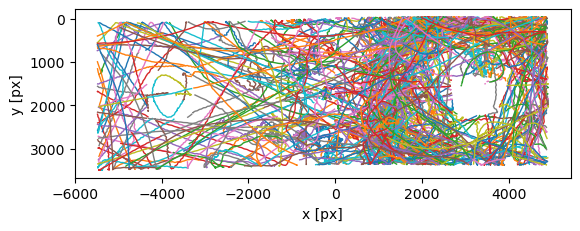

<Axes: xlabel='x [px]', ylabel='y [px]'>

In [29]:
t1 = tp.filter_stubs(t, 200)
fig = plt.figure()
ax = plt.gca().set_aspect('equal', adjustable='box')
tp.plot_traj(t1, ax=ax)

In [30]:
fig.savefig('/Users/njwheeler/GitHub/invision-tools/testing/merge_pickle/merge.pdf')